<a href="https://colab.research.google.com/github/hellfireworld/MachineLearning/blob/master/Ergasia1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import essential libraries.**

In [0]:
from sklearn.linear_model import SGDClassifier, SGDRegressor
import sys
import io
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
import pandas
from sklearn import metrics
from sklearn.model_selection import KFold
from google.colab import files

**Import day.csv file with GOOGLE_COLAB**

In [0]:
uploaded = files.upload()

Saving day.csv to day.csv


In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "day.csv" with length 56806 bytes


**Test if day.csv is loaded.**

In [18]:
uploaded

{'day.csv': b'instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt\r\n1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985\r\n2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801\r\n3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349\r\n4,1/4/2011,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562\r\n5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600\r\n6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606\r\n7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510\r\n8,1/8/2011,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959\r\n9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822\r\n10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321\r\n11,1/11/2011,1,0,1,0,2,1,2,0.169091,0.191464,0.686364,0.122132,43,1220,1263\r\n12,1/12/2011,1,0,1,0,3,1,1,0.17

**Define df variable as day.csv using pandas library.
Read a comma-separated values (csv) file into DataFrame.**

In [0]:
df = pandas.read_csv(io.StringIO(uploaded['day.csv'].decode('utf-8')))

**Select all the data from the necessary features to have a good model and store them in X variable.**

**Select the most prominent feature and store it in X2 variable.**

**Store the data of target_variable(cnt) in y variable.**

In [13]:
X = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum']]
X2 = df[['temp']]
y = df['cnt']
print(X.head())
print(y.head())

labels = ["few", "many"] # binary classification few -> 0 and many -> 1
y_categorical = pandas.cut(y, 2, labels=labels)
print(y_categorical.head())



   season  yr  mnth  holiday  ...  weathersit      temp     atemp       hum
0       1   0     1        0  ...           2  0.344167  0.363625  0.805833
1       1   0     1        0  ...           2  0.363478  0.353739  0.696087
2       1   0     1        0  ...           1  0.196364  0.189405  0.437273
3       1   0     1        0  ...           1  0.200000  0.212122  0.590435
4       1   0     1        0  ...           1  0.226957  0.229270  0.436957

[5 rows x 10 columns]
0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64
0    few
1    few
2    few
3    few
4    few
Name: cnt, dtype: category
Categories (2, object): [few < many]


**Explore y_categorical.**

In [14]:
######### y_categorical_array -> few or many ################################
count_few = 0
count_many = 0
for i in range(731):
    #print('y_categorical[%d] : '%(i), y_categorical[i])
    if (y_categorical[i] == "many"):
        count_many += 1
    elif(y_categorical[i] == "few"):
        count_few += 1
print('few counted: %d' % count_few)
print('many counted: %d' % count_many)
if count_many > count_few:
    print('\n', 'The cyclists in dataset are many', '\n')
elif count_many < count_few:
    print('\n', 'The cyclists in dataset are few', '\n')
#############################################################################

few counted: 341
many counted: 390

 The cyclists in dataset are many 



**Reassign X in X_main variable and y_categorical in y_class.**

**Set 1 instance(n=1) and store 1 instance from (X2)the most prominent feature in fx2 variable and 1 instance from y_categorical in fy2.**

In [0]:
#for all the features
X_main = X.values
y_class = y_categorical.values

#for the most prominent feature
n = 1 ;# number of instances to keep
fX2 = X2[:n].values
fy2 = y_categorical[:n].values

**We set the learning rate close to 0 learning_rate_1=0.01 because we have a lot of data and we will use a lot of features for X.**

**We will use Stohastic Gradient Descent with 2 different loss functions but the most optimized way to reach a global minimum is the log as loss function(the second one).**

**We will use kfold for cross_validation and we will split the data in 15 pieces, 14 for training and 1 for validation**

**In every run we will use metrics.accuracy_score to store the accuracies of train in acc_train and the accuracies of test in acc_test.**

**We prefer the log as loss function in Logistic Regression because it's more convex function than (mean)squared_loss and it's more guaranteed to reach a global minimum.**

In [16]:
##### for all the features #####################################################
learning_rate_1 = 0.01

sgd  = SGDClassifier(loss="squared_loss", learning_rate='constant', eta0=learning_rate_1, penalty=None, max_iter=1,
                     average=False, random_state=2018, verbose=1)
sgd2 = SGDClassifier(loss="log", learning_rate='constant', eta0=learning_rate_1, penalty=None, max_iter=1,
                     average=False, random_state=2018, verbose=1)

kf = KFold(n_splits=15, shuffle=False, random_state=None)

#We don't often use squared_loss as loss function in Logistic Regression because it's not a convex function and it's not guaranteed to reach global minimum
print('\n', 'Loss Function - Squared_Loss')
print('\n We do not prefer to use the squared_loss as a loss function for Logistic Regression')
for train_index, test_index in kf.split(X_main):
    X_train, X_test = X_main[train_index], X_main[test_index]
    y_train, y_test = y_class[train_index], y_class[test_index]
    model  = sgd.partial_fit(X_train, y_train, classes=labels)
    y_pred1 = model.predict(X_train)
    acc_train = metrics.accuracy_score(y_train, y_pred1)
    y_pred2 = model.predict(X_test)
    acc_test = metrics.accuracy_score(y_test, y_pred2)
    print('acc_train:', acc_train)
    print('acc_test:', acc_test)
    #print(model.coef_)
print('\n')
#We prefer to use log as loss function in Logistic Regression because it's a convex function and it can reach global minimum
print('\n', 'Loss Function - Log:')
print('\n We prefer to use the log as a loss function for Logistic Regression')
for train_index, test_index in kf.split(X_main):
    X_train, X_test = X_main[train_index], X_main[test_index]
    y_train, y_test = y_class[train_index], y_class[test_index]
    model2 = sgd2.partial_fit(X_train, y_train, classes=labels)
    y2_pred1 = model2.predict(X_train)
    acc_train2 = metrics.accuracy_score(y_train, y2_pred1)
    y2_pred2 = model2.predict(X_test)
    acc_test2 = metrics.accuracy_score(y_test, y2_pred2)
    print('acc_train2:', acc_train2)
    print('acc_test2:', acc_test2)
    #print(model2.coef_)



 Loss Function - Squared_Loss

 We do not prefer to use the squared_loss as a loss function for Logistic Regression
-- Epoch 1
Norm: 0.89, NNZs: 10, Bias: -0.136381, T: 682, Avg. loss: 0.700202
Total training time: 0.00 seconds.
acc_train: 0.750733137829912
acc_test: 0.8571428571428571
-- Epoch 1
Norm: 1.18, NNZs: 10, Bias: -0.298491, T: 682, Avg. loss: 0.579962
Total training time: 0.00 seconds.
acc_train: 0.782991202346041
acc_test: 0.8571428571428571
-- Epoch 1
Norm: 1.38, NNZs: 10, Bias: -0.489364, T: 682, Avg. loss: 0.521756
Total training time: 0.00 seconds.
acc_train: 0.8093841642228738
acc_test: 0.7551020408163265
-- Epoch 1
Norm: 1.51, NNZs: 10, Bias: -0.690933, T: 682, Avg. loss: 0.481031
Total training time: 0.00 seconds.
acc_train: 0.8152492668621701
acc_test: 0.6326530612244898
-- Epoch 1
Norm: 1.64, NNZs: 10, Bias: -0.794018, T: 682, Avg. loss: 0.438514
Total training time: 0.00 seconds.
acc_train: 0.8269794721407625
acc_test: 0.5918367346938775
-- Epoch 1
Norm: 1.76, NN

**The last exercise needs us to plot the loss with respect to (y-y[hat]) for one of the two prominent features selected in step a**

**Because we use fx2,fy2 that store only one instance of X and y_categorical we will use a bigger learning rate, learning_rate_2=2.**

Because we need to plot the loss over epochs 


 for the most_prominent feature 
model3:  [[-7.77531449]]
model4:  [[-1.09013377]]


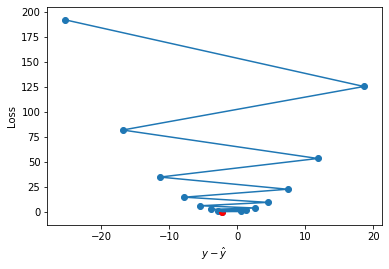

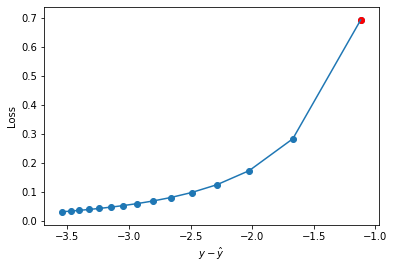

In [17]:
################# for the most_prominent feature ############################
print('\n', 'for the most_prominent feature ')
old_stdout2 = sys.stdout
sys.stdout = mystdout2 = StringIO()

learning_rate_2 = 2

sgd3  = SGDClassifier(loss="squared_loss", learning_rate='constant', eta0=learning_rate_2, penalty=None, max_iter=1,
                     average=False, random_state=2018, verbose=1)
sgd4 = SGDClassifier(loss="log", learning_rate='constant', eta0=learning_rate_2, penalty=None, max_iter=1,
                     average=False, random_state=2018, verbose=1)

p3_sum  = [] ;# this holds the sum of y-y_hat, for all instances (ok, we have only one instance)
p4_sum = []
epochs = 15 ;# number of epochs

for epoch in range(epochs):
    model3  = sgd3.partial_fit(fX2, fy2, classes=labels)
    model4 = sgd4.partial_fit(fX2, fy2, classes=labels)
    #print(model.coef_)
    y3  = model3.predict(fX2)
    p3  = model3.decision_function(fX2)
    c3  = (1 - np.mean(y3 == fy2))
    p3_sum.append(p3)
    y4 = model4.predict(fX2)
    p4 = model4.decision_function(fX2)
    c4 = (1 - np.mean(y4 == fy2))
    p4_sum.append(p4)
    #p3 = model.predict_proba(fX2)
    #print(y3, y4, fy2, c3, c4, p3, p4)
    #p3_sum.append(np.sum(fy2-y))

sys.stdout = old_stdout2
loss_history2 = mystdout2.getvalue()
# print(loss_history)
loss_list3 = []
loss2_list4 = []
use_first2 = True
for line in loss_history2.split('\n'):
    if (len(line.split("loss: ")) == 1):
        continue
    if use_first2:
        loss_list3.append(float(line.split("loss: ")[-1]))
    else:
        loss2_list4.append(float(line.split("loss: ")[-1]))
    use_first2 = not use_first2
print('model3: ', model3.coef_)
print('model4: ', model4.coef_)

#########################  For one of the two prominent features selected in step a), plot the loss with respect to (y-y[hat])################################
plt.figure()
plt.plot(p3_sum, loss_list3)
plt.scatter(p3_sum, loss_list3)
plt.scatter(p3_sum[:1], loss_list3[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()
plt.figure()
plt.plot(p4_sum, loss2_list4)
plt.scatter(p4_sum, loss2_list4)
plt.scatter(p4_sum[:1], loss2_list4[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()